In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import scipy.optimize as opt
from scipy.optimize import fmin_tnc
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()
iris_data = iris.data

In [3]:
# if you already have your dataset
iris=pd.read_csv("../data/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
dataset = pd.DataFrame(iris, columns = iris.feature_names)
dataset['target'] = iris.target

In [11]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...
145,NaN,NaN,NaN,NaN,2
146,NaN,NaN,NaN,NaN,2
147,NaN,NaN,NaN,NaN,2
148,NaN,NaN,NaN,NaN,2


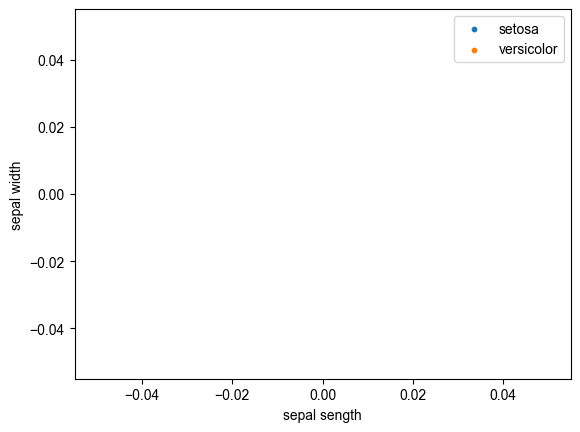

In [12]:
#Sepal length and width scatter plot for setosa and versicolor
if __name__ == "__main__":
    data = dataset[0:100]
    X = data.iloc[:, :-3]
    y = data.iloc[:, -1]

    setosa = data.loc[y == 0]

    versicolor = data.loc[y == 1]

    plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
    plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')
    plt.xlabel('sepal sength')
    plt.ylabel('sepal width')
    plt.legend()
    plt.style.use('seaborn')
    plt.show()

In [13]:
#Variables
X = np.c_[np.ones((X.shape[0], 1)), X]
y = np.array(y)[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [27]:
# Variables Types
print('X: ', type(X), X.shape)
print('y: ', type(y), y.shape)
print('theta: ', type(theta), theta.shape)

X:  <class 'numpy.ndarray'> (100, 3)
y:  <class 'numpy.ndarray'> (100, 1)
theta:  <class 'numpy.ndarray'> (3, 1)


In [14]:
#Sigmoid function, net input, and probability
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [15]:
def net_input(theta, x):
    return np.dot(x, theta)

In [16]:
def probability(theta, x):
    return sigmoid(net_input(theta, x))

In [17]:
#Cost fucntion and gradient
def cost_function(theta, x, y):
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    return total_cost

In [18]:
def gradient(theta, x, y):
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(net_input(theta,   x)) - y)

In [19]:
#error
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [21]:
#fit
def fit(x, y, theta):
    opt_weights = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient,args=(x, y.flatten()))
    return opt_weights[0]

In [28]:
parameters = fit(X, y, theta)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [23]:
#decision boundary 
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]

NameError: name 'parameters' is not defined

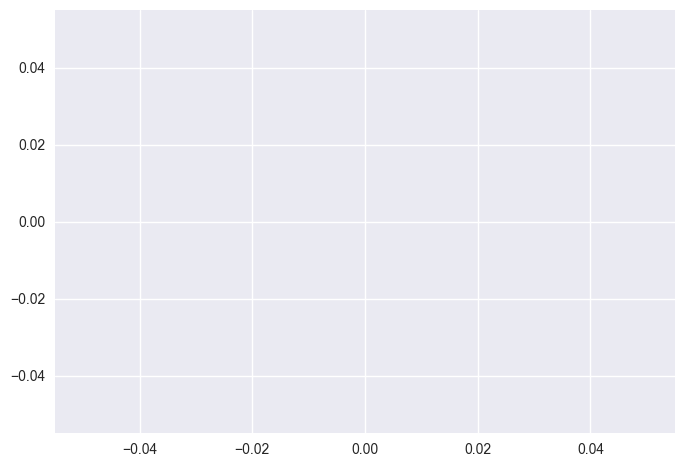

In [24]:
plt.scatter(setosa.iloc[:, 0], setosa.iloc[:, 1], s=10, label='setosa')
plt.scatter(versicolor.iloc[:, 0], versicolor.iloc[:, 1], s=10, label='versicolor')

In [25]:
plt.plot(x_values, y_values, label='Decision Boundary', color='orange')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

NameError: name 'y_values' is not defined